In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [35]:
rcParams['figure.figsize'] = 20,10
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Load Dataset

In [2]:
df =pd.read_csv('Clicked Ads Dataset.csv')
df.head(5)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


## Exploratory Data

### Descriptive Statistics

In [3]:
rows = df.shape[0]
cols = df.shape[1]

print(f'''this dataset has {rows} rows''')
print(f'''this dataset has {cols} columns''')

this dataset has 1000 rows
this dataset has 11 columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [5]:
df1 = df.copy()
df1.drop(columns = ['Unnamed: 0'], inplace = True)

In [11]:
df1.rename({'Male' : 'Gender', 'Area Income':'Income'}, axis = 1, inplace = True)

In [23]:
df1['timestamp'] = pd.to_datetime(df1['Timestamp'])
df1.drop(columns = ['Timestamp'], inplace = True)

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  987 non-null    float64       
 1   Age                       1000 non-null   int64         
 2   Income                    987 non-null    float64       
 3   Daily Internet Usage      989 non-null    float64       
 4   Gender                    997 non-null    object        
 5   Clicked on Ad             1000 non-null   object        
 6   city                      1000 non-null   object        
 7   province                  1000 non-null   object        
 8   category                  1000 non-null   object        
 9   timestamp                 1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 78.2+ KB


In [12]:
df1.isna().sum()

Daily Time Spent on Site    13
Age                          0
Income                      13
Daily Internet Usage        11
Gender                       3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [13]:
num_dtypes = ['int64', 'float64']
nums_df = df1.select_dtypes(include = num_dtypes)
nums = nums_df.columns

print(nums)

Index(['Daily Time Spent on Site', 'Age', 'Income', 'Daily Internet Usage'], dtype='object')


In [26]:
cat_dtypes = ['object']
cat_df = df1.select_dtypes(include = cat_dtypes)
cat = cat_df.columns

print(cat)

Index(['Gender', 'Clicked on Ad', 'city', 'province', 'category'], dtype='object')


In [17]:
df1[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,987.0,6.492952e+01,1.584470e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
Income,987.0,3.848647e+08,9.407999e+07,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
Daily Internet Usage,989.0,1.798636e+02,4.387014e+01,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02


In [27]:
df1[cat].describe()

,Gender,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000
unique,2,2,30,16,10
top,Perempuan,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,500,64,253,112


In [28]:
for col in cat :
    print(f'''Value count {col} column:''')
    print(df1[col].value_counts())
    print('----------------------------------------------')
    print()

Value count Gender column:
Perempuan    518
Laki-Laki    479
Name: Gender, dtype: int64
----------------------------------------------

Value count Clicked on Ad column:
No     500
Yes    500
Name: Clicked on Ad, dtype: int64
----------------------------------------------

Value count city column:
Surabaya             64
Bandung              64
Jakarta Timur        63
Jakarta Selatan      61
Jakarta Barat        57
Bekasi               56
Medan                48
Jakarta Utara        45
Palembang            42
Semarang             41
Batam                34
Makassar             33
Tangerang Selatan    33
Tangerang            32
Depok                30
Bandar Lampung       29
Bogor                28
Jakarta Pusat        27
Malang               26
Banjarmasin          23
Pakanbaru            23
Denpasar             21
Padang               19
Balikpapan           18
Cimahi               17
Samarinda            16
Tasikmalaya          15
Pontianak            12
Surakarta            12
Seran

### Univariate Analysis

#### Numerical Columns

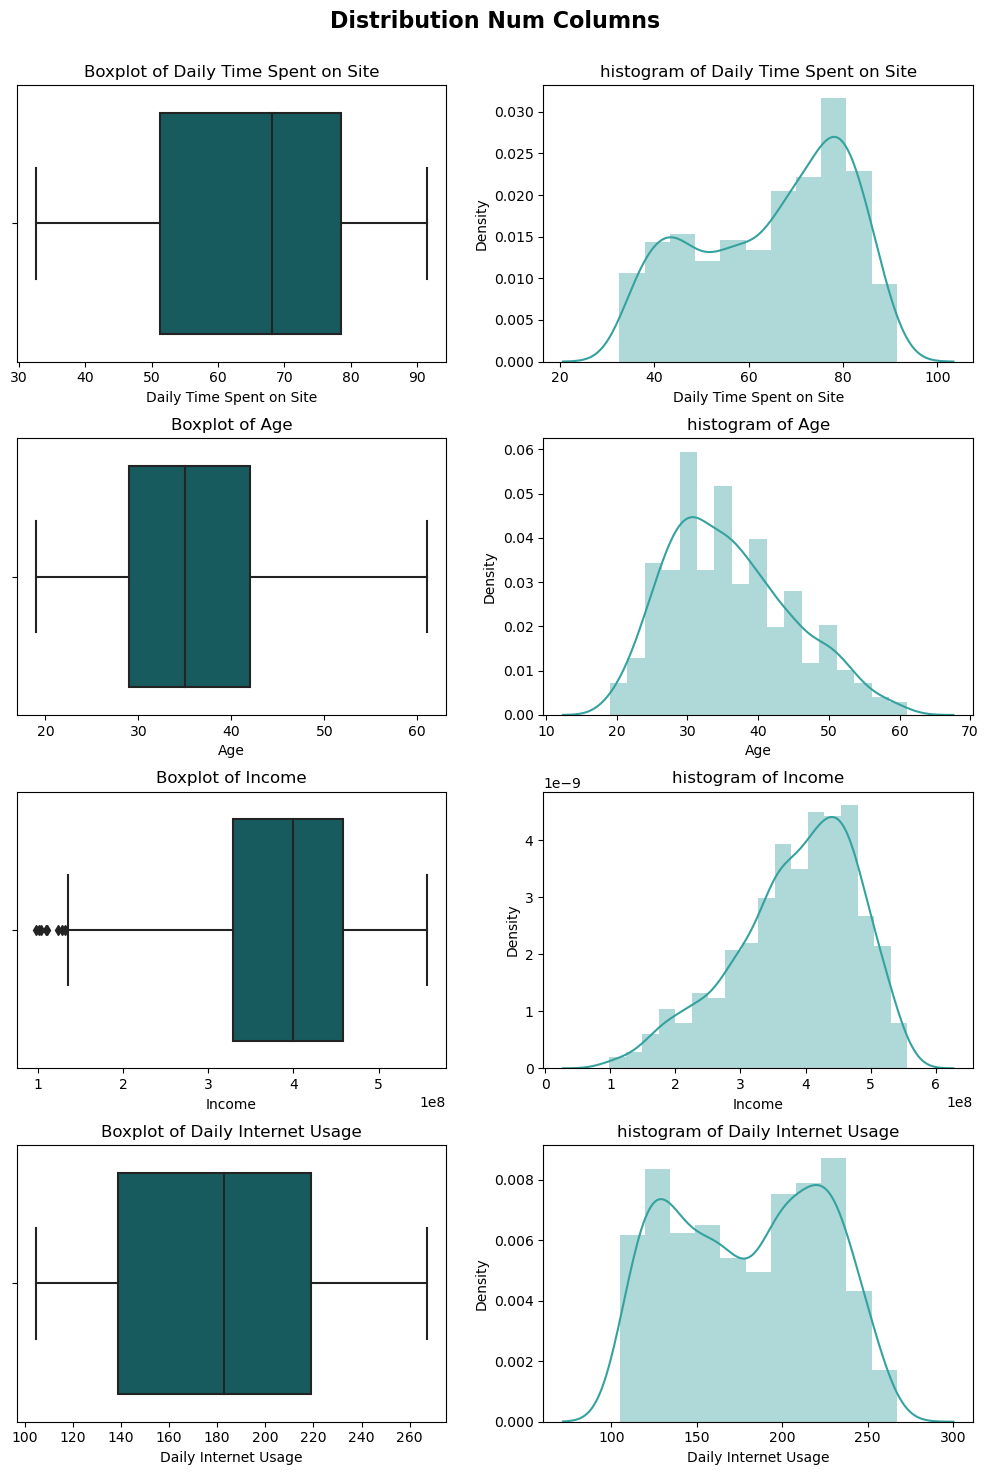

In [79]:
fig,ax = plt.subplots(4,2,figsize = (10,15))
fig.suptitle('Distribution Num Columns', fontsize = 16, ha = 'center', fontweight = 'bold')
clr = ['#071952', '#0B666A', '#35A29F', '#97FEED']

for i, col in enumerate(nums):
    sns.boxplot(x = col, data = df1, color = '#0B666A', ax=ax[i, 0])
    ax[i,0].set_title(f'''Boxplot of {col}''', fontsize = 12)
    sns.distplot(df1[col], color = '#35A29F', ax=ax[i,1])
    ax[i,1].set_title(f'''histogram of {col}''', fontsize = 12)
    
fig.tight_layout()
fig.subplots_adjust(top = 0.93)
plt.savefig('fig/Univariate_Analysis_Nums.png')

clr = ['#071952', '#0B666A', '#35A29F', '#97FEED']

clr = ['#40128B', '#9336B4', '#DD58D6', '#97FEED']

clr = ['#0079FF', '#00DFA2', '#F6FA70', '#FF0060']

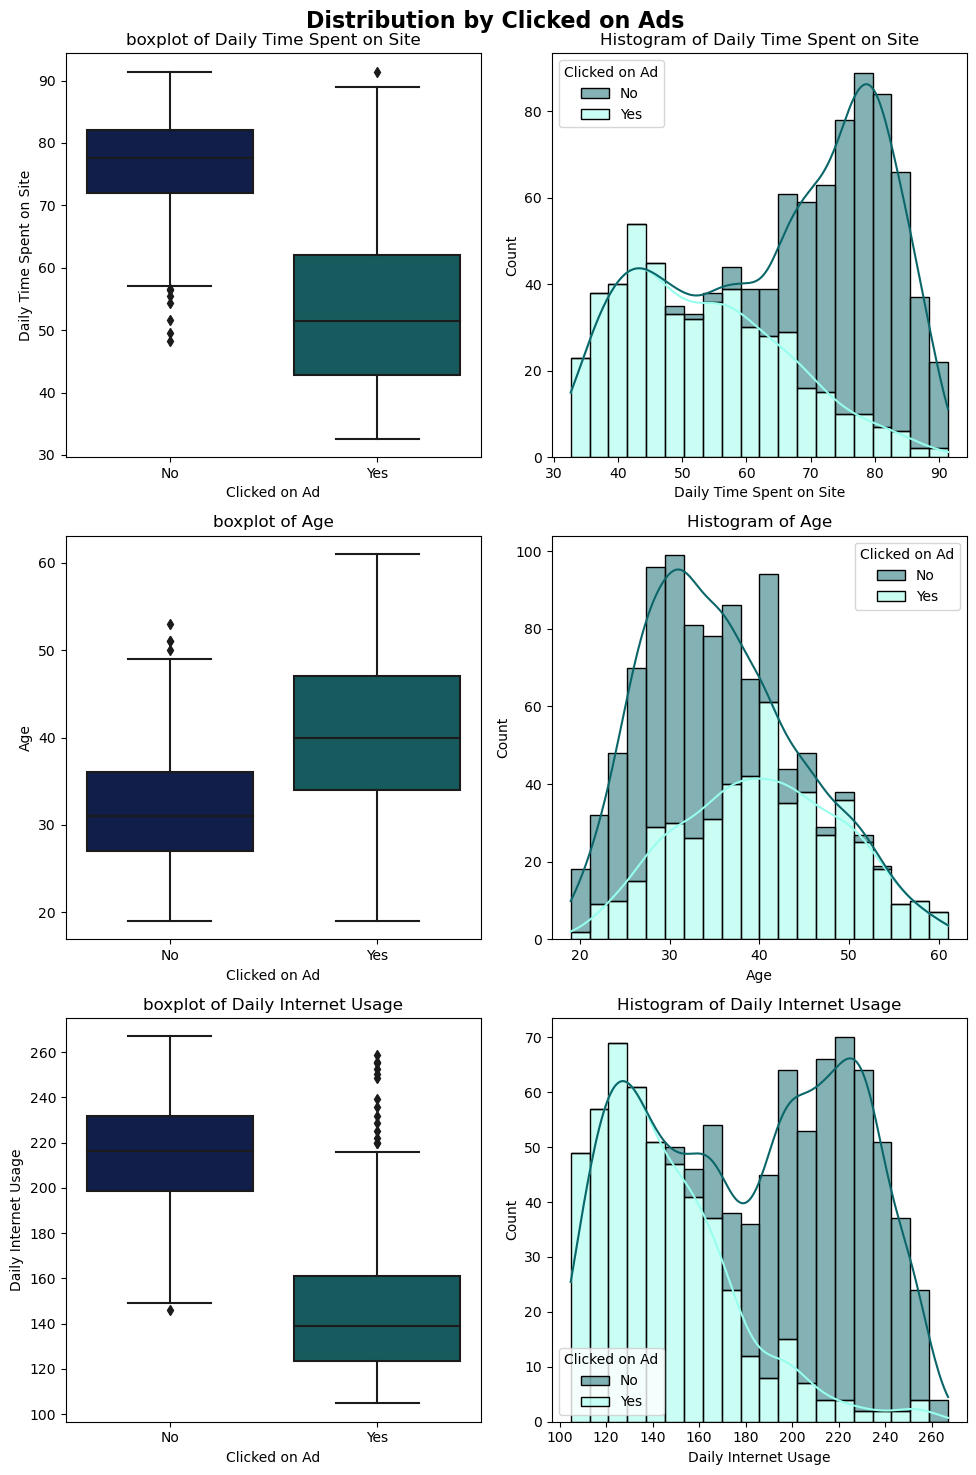

In [80]:
num = ['Daily Time Spent on Site', 'Age', 'Daily Internet Usage']

clr1 = ['#0B666A', '#97FEED']
fig,ax = plt.subplots(3,2,figsize = (10,15))
fig.suptitle('Distribution by Clicked on Ads', fontsize = 16, fontweight = 'bold', ha = 'center')
for i, col in enumerate(num):
    sns.boxplot(data = df1, x='Clicked on Ad', y = col, palette = clr, ax =ax[i,0])
    ax[i,0].set_title(f'''boxplot of {col}''', fontsize = 12)
    sns.histplot(data = df1, x =col, hue =  'Clicked on Ad', bins =20, 
                 kde = True, multiple = 'stack', palette = clr1, ax = ax[i,1])
    ax[i,1].set_title(f'''Histogram of {col}''', fontsize = 12)
    
# fig.delaxes(ax[-1])
fig.tight_layout()
plt.savefig('fig/Univariate_analysis_by_Clicked_on_Ads.png')

#### Categorical Columns

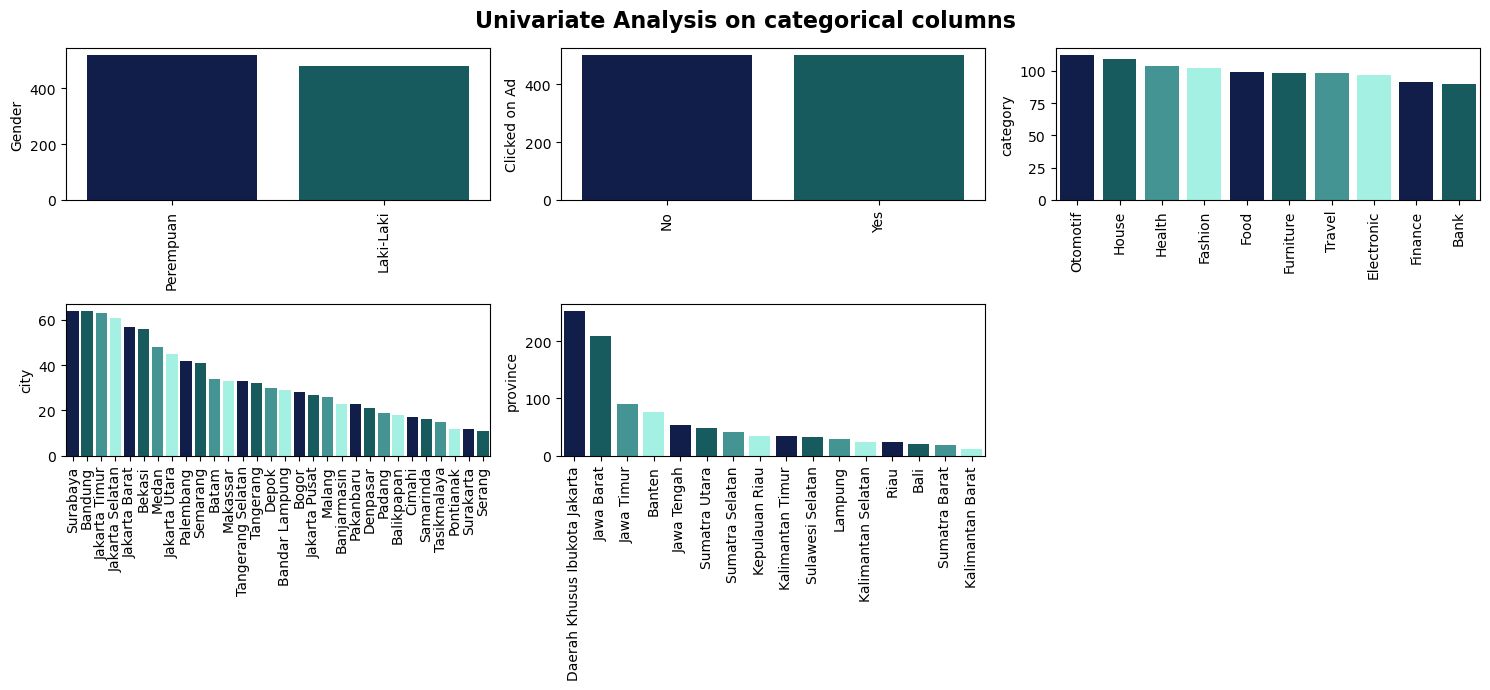

In [82]:
plt.figure(figsize=(15, 7))
cat = ['Gender','Clicked on Ad', 'category', 'city', 'province']
clr = ['#071952', '#0B666A', '#35A29F', '#97FEED']
plt.suptitle('Univariate Analysis on categorical columns', fontsize =16, fontweight = 'bold', ha = 'center')
for i in range(0, len(cat)):
    plt.subplot(2,3,i+1)
    sns.barplot(x=df1[cat[i]].value_counts().index, y=df1[cat[i]].value_counts(), palette = clr)
    plt.xticks(rotation = 90)
    plt.tight_layout()
    
plt.savefig('fig/Univariate_analysis_categorical.png')

### Bivariate Analysis

b

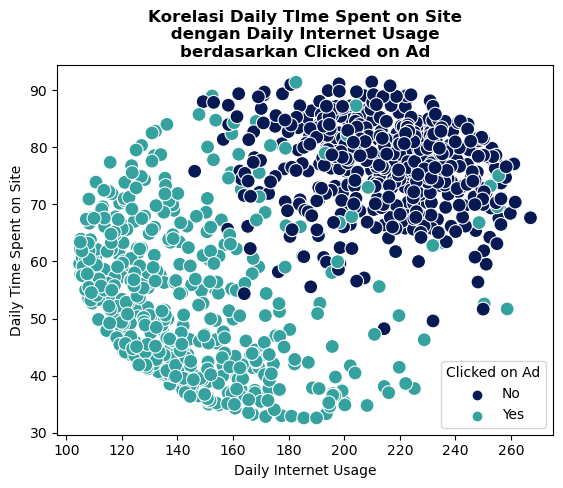

In [87]:
clr2 = ['#071952', '#35A29F']

sns.scatterplot(x=df1['Daily Internet Usage'], y= df1['Daily Time Spent on Site'], 
                hue = df['Clicked on Ad'], palette = clr2, s=100)
plt.title('Korelasi Daily TIme Spent on Site\n dengan Daily Internet Usage \nberdasarkan Clicked on Ad',
          fontsize = 12, fontweight = 'bold', ha = 'center')

plt.savefig('fig/Bivariate_DTSOS-DIS.png')

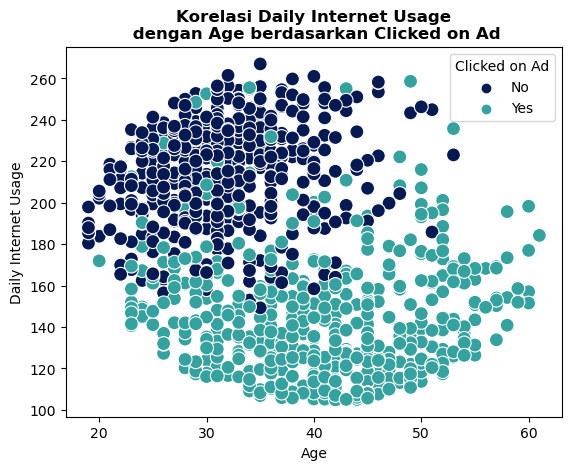

In [90]:
sns.scatterplot(x = df1['Age'], y = df1['Daily Internet Usage'],
                hue = df1['Clicked on Ad'], palette = clr2, s= 100)
plt.title('Korelasi Daily Internet Usage\n dengan Age berdasarkan Clicked on Ad',
          fontsize = 12, fontweight = 'bold', ha = 'center')

plt.savefig('fig/bivariate_DIU-AGE.png')

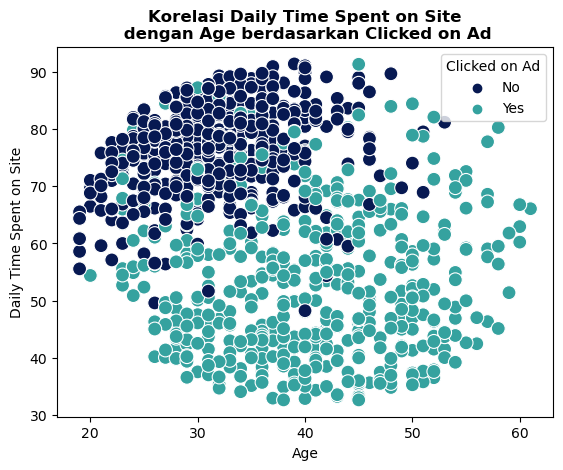

In [91]:
sns.scatterplot(x = df1['Age'], y = df1['Daily Time Spent on Site'], 
                hue = df1['Clicked on Ad'], palette = clr2, s= 100)
plt.title('Korelasi Daily Time Spent on Site\n dengan Age berdasarkan Clicked on Ad',
          fontsize = 12, fontweight = 'bold', ha = 'center')

plt.savefig('fig/bivariate_DTSOS-AGE.png')

### Multivariate Analysis

In [67]:
df1.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
Daily Time Spent on Site,1.000000,-0.331424,0.308266,0.518294
Age,-0.331424,1.000000,-0.179343,-0.370481
Area Income,0.308266,-0.179343,1.000000,0.338080
Daily Internet Usage,0.518294,-0.370481,0.338080,1.000000


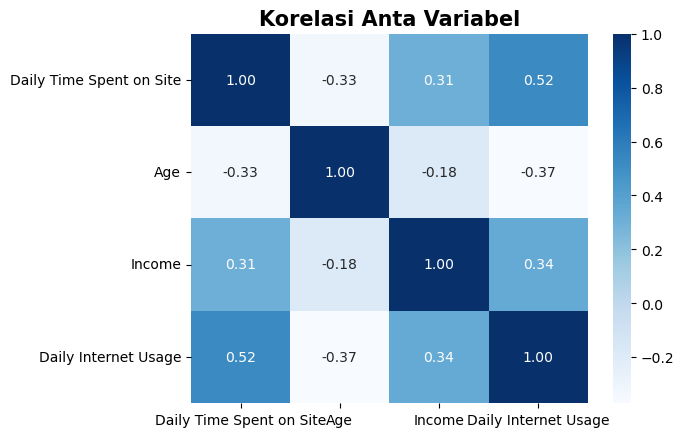

In [92]:
sns.heatmap(df1.corr(), cmap = 'Blues', annot = True, fmt = '.2f')
plt.title('Korelasi Anta Variabel',
          fontsize = 15, fontweight = 'bold', ha = 'center')

plt.savefig('fig/CORR.png')

## Cleansing Data


In [12]:
print(f'''dataset ini memiliki {df1.duplicated().sum()} duplikat data''')

dataset ini memiliki 0 duplikat data


In [81]:
df1.isna().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64